In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tunisian-house-prices-prediction/Sample_submission.csv
/kaggle/input/tunisian-house-prices-prediction/train.csv
/kaggle/input/tunisian-house-prices-prediction/test.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [4]:
train_d=pd.read_csv("/kaggle/input/tunisian-house-prices-prediction/train.csv",na_values='?')
test_d=pd.read_csv("/kaggle/input/tunisian-house-prices-prediction/test.csv")
Sample_submission=pd.read_csv("/kaggle/input/tunisian-house-prices-prediction/Sample_submission.csv")

In [5]:
train_d.head()

,price_tnd,location,city,governorate,Area,pieces,room,bathroom,age,state,...,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning,Id
0,2000000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,NaN,1.0,...,0,0,0,0,0,1,1,1,1,2
1,2000000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,NaN,NaN,NaN,...,0,0,0,0,0,1,1,1,1,3
2,2000000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,NaN,1.0,...,0,0,0,0,0,1,1,1,1,4
3,1200000.0,Midoun,NaN,Djerba,370.0,21.0,9.0,5.0,NaN,NaN,...,0,0,0,1,0,0,0,0,0,6
4,3200000.0,El Kantaoui,Hammam Sousse,Sousse,1899.0,20.0,5.0,7.0,NaN,1.0,...,0,0,0,1,0,0,1,1,1,7


In [6]:
train_d.describe()

,price_tnd,Area,pieces,room,bathroom,state,latt,long,distance_to_capital,garage,...,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning,Id
count,5.678000e+03,5572.000000,4849.000000,5303.000000,5136.000000,4761.000000,5667.000000,5667.000000,5667.000000,5678.000000,...,5678.000000,5678.000000,5678.000000,5678.000000,5678.000000,5678.000000,5678.000000,5678.000000,5678.000000,5678.000000
mean,6.881603e+05,364.657574,4.328315,3.281350,1.992796,1.385423,36.432680,10.413205,64.858676,0.467242,...,0.244452,0.102149,0.071504,0.231596,0.261007,0.040683,0.566044,0.573970,0.555830,3266.360338
std,9.038283e+05,989.744915,2.287022,1.944157,1.203754,0.557559,1.045067,0.367991,113.998014,0.498970,...,0.429800,0.302870,0.257688,0.421889,0.439223,0.197573,0.495663,0.494542,0.496917,1874.308978
min,1.050000e+04,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.003560,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.600000e+05,117.000000,3.000000,2.000000,1.000000,1.000000,36.401080,10.221220,11.392035,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1643.250000
50%,4.200000e+05,175.000000,4.000000,3.000000,2.000000,1.000000,36.830170,10.325278,17.806338,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3288.500000
75%,7.850000e+05,365.000000,5.000000,4.000000,2.000000,2.000000,36.876389,10.614570,72.825068,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4900.750000
max,1.900000e+07,22000.000000,26.000000,42.000000,14.000000,2.000000,37.363996,11.331493,4224.947771,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6416.000000


In [ ]:
## from this visualization i identify that i have some outlires in some features like pieces room bathroom...

In [ ]:
train_d.info()

In [ ]:
###data visualization

In [ ]:
train_d.isnull().sum()

In [7]:
features_na=[col for col in train_d.columns if train_d[col].isnull().sum()>1]
features_na

['city',
 'Area',
 'pieces',
 'room',
 'bathroom',
 'age',
 'state',
 'latt',
 'long',
 'distance_to_capital']

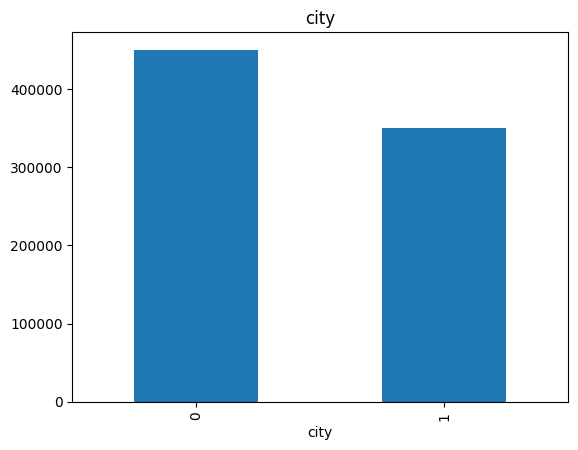

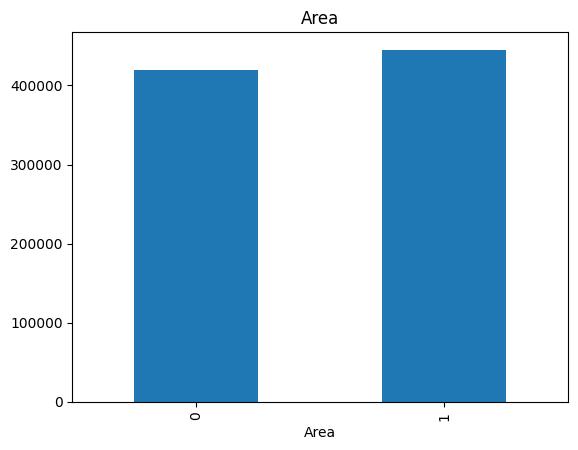

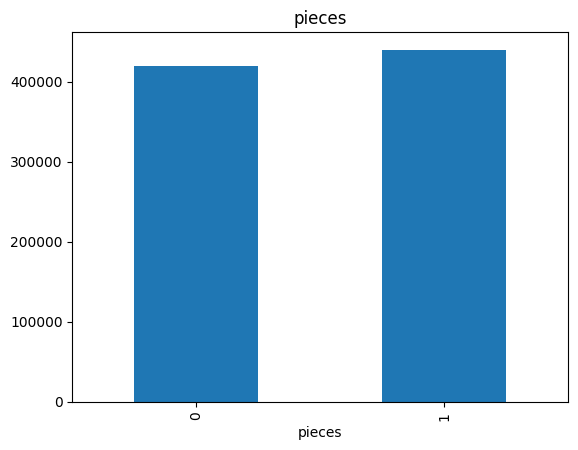

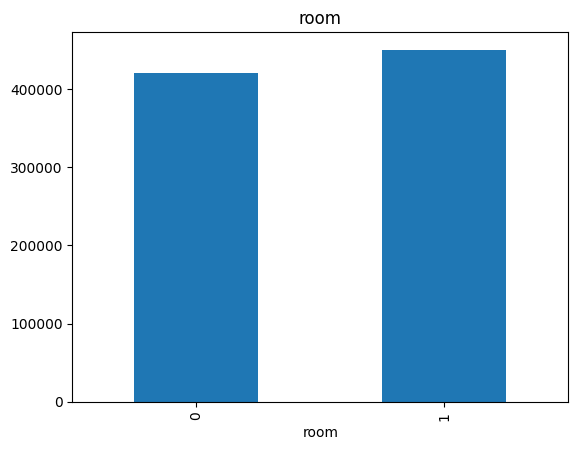

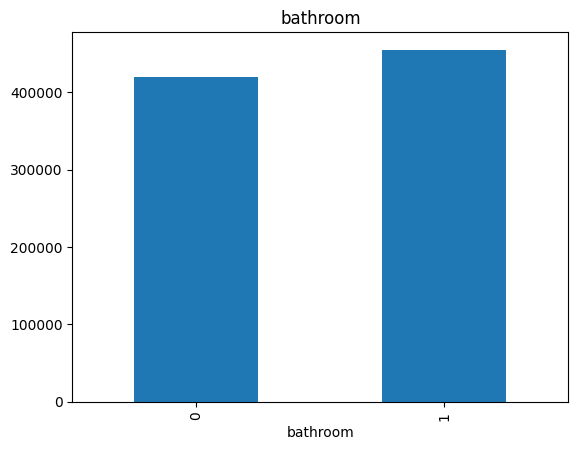

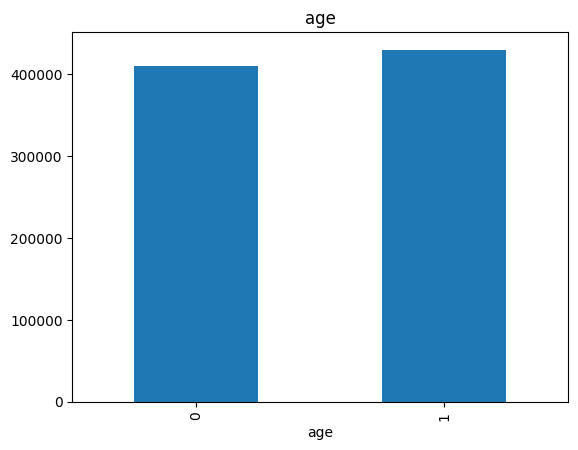

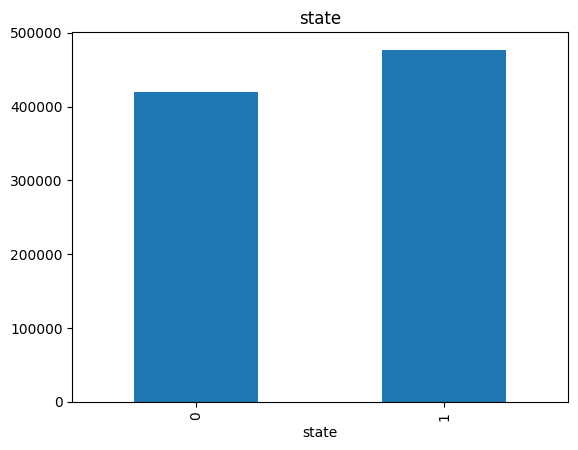

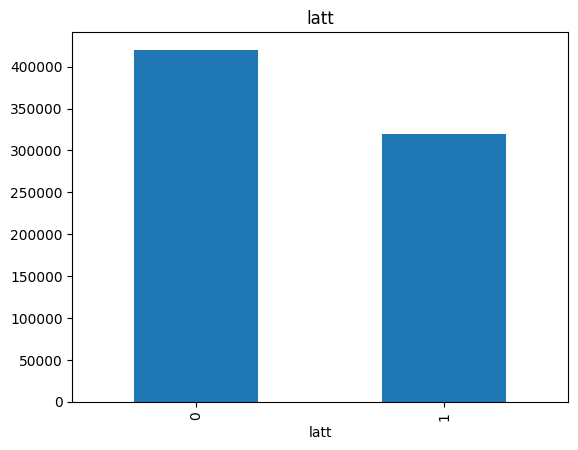

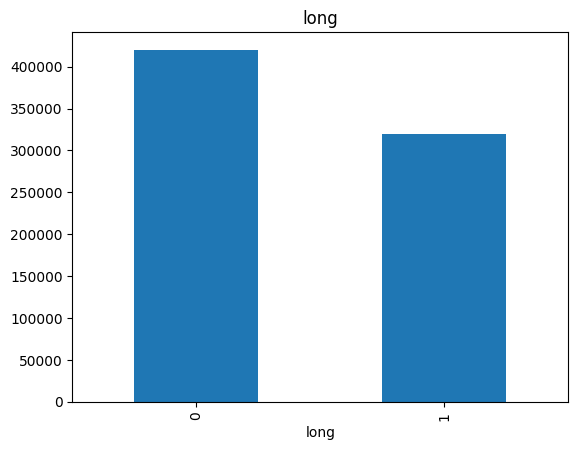

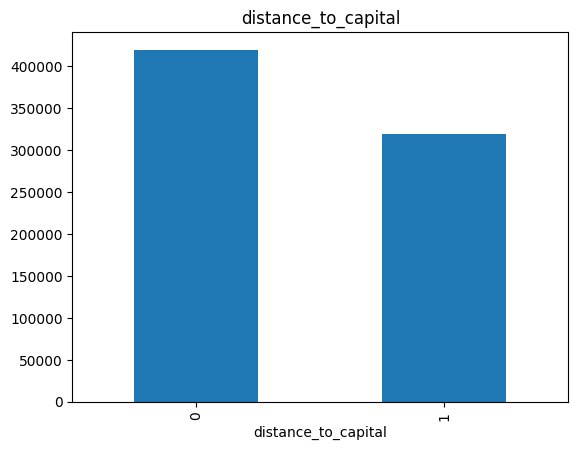

In [8]:
for feature in features_na:
    data=train_d.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['price_tnd'].median().plot.bar()
    plt.title(feature)
    plt.show()

there is some feature where missing value decrease the price of house like {distance to capital ,city , long ,alt, area}
all this features have relation with the place of house ,this result indicate that place of house is imporatante


In [ ]:
train_d.columns

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x='pieces',y='price_tnd',data=train_d)
plt.figure(figsize=(50,10))

In [ ]:
###best thing is dealing  with outlires before start visualize your data

In [9]:
print((np.where(train_d['price_tnd']<0.55000e+05))[0].shape)
cl_train=train_d[(train_d['price_tnd']>0.550000e+05)]



(9,)


In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.boxplot(x="room", y="price_tnd", data=cl_train)
plt.show()

In [10]:
print((np.where(cl_train['room']>6))[0].shape)
cl_train=cl_train[cl_train['room']<=6]

cl_train.shape

(260,)


(5034, 25)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.boxplot(x="pieces", y="price_tnd", data=cl_train)
plt.show()

In [11]:
print((np.where(cl_train['Area']>1500))[0].shape)
cl_train=cl_train[cl_train['Area']<=1500]
cl_train.shape

(68,)


(4871, 25)

In [12]:
print((np.where(cl_train['bathroom']>5))[0].shape)
cl_train=cl_train[cl_train['bathroom']<=5]
cl_train.shape

(28,)


(4674, 25)

In [13]:
tun_al=np.full((cl_train['latt'].shape[0]),36.8065)
tun_long=np.full((cl_train['long'].shape[0]),9.537499)

d=6378*np.arccos(np.sin(tun_al)*np.sin(cl_train['latt'])+np.cos(tun_al)*np.cos(cl_train['latt'])*np.cos(tun_long-cl_train['long']))
d=pd.DataFrame(d)
cl_train['dis']=d
test_d['dis']=d

/tmp/ipykernel_31/4108998646.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =cl_train[features_corr].corr()


<AxesSubplot: >

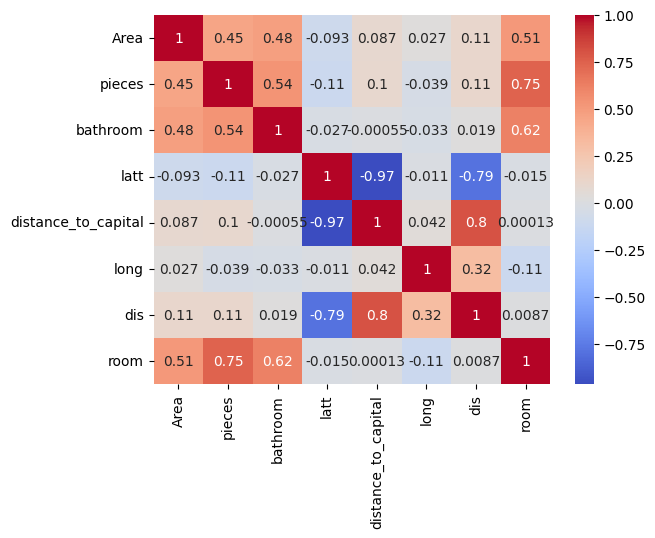

In [63]:
features_corr=['location','Area','pieces','bathroom','age','latt','distance_to_capital','long','dis','room']
corr =cl_train[features_corr].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

<AxesSubplot: xlabel='room', ylabel='pieces'>

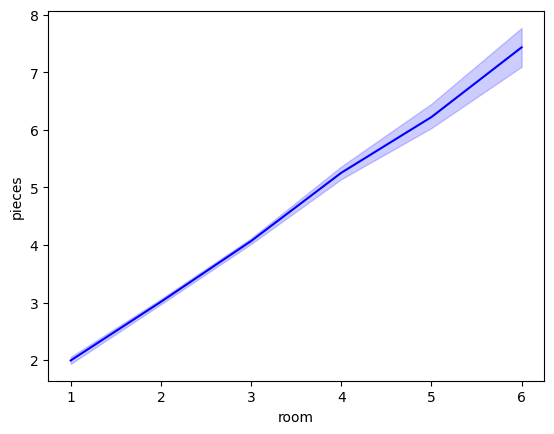

In [64]:
sns.lineplot(x='room',y='pieces',color='b',data=cl_train)

In [14]:
cl_train=cl_train.drop(['latt','dis','distance_to_capital'],axis=1)
test_d=test_d.drop(['latt','dis','distance_to_capital'],axis=1)

In [15]:
numerical_features=[feature for feature in cl_train.columns if cl_train[feature].dtype!='O']
print ("number of numerical features:",len(numerical_features))
cl_train[numerical_features].head()

number of numerical features: 19


,price_tnd,Area,pieces,room,bathroom,state,long,garage,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning,Id
9,2200000.0,600.0,16.0,5.0,3.0,NaN,10.850000,1,0,0,0,0,1,0,0,0,1,0,17
10,2200000.0,600.0,16.0,5.0,3.0,2.0,11.012510,1,0,0,0,0,1,0,0,1,1,0,18
11,775000.0,350.0,16.0,6.0,5.0,NaN,10.850000,0,0,0,0,0,0,0,0,0,1,0,19
20,755000.0,350.0,14.0,6.0,5.0,1.0,11.040065,1,0,0,0,0,0,0,1,1,0,1,32
27,900000.0,300.0,13.0,5.0,3.0,2.0,10.614570,0,0,0,0,0,0,0,0,0,0,0,51


<AxesSubplot: >

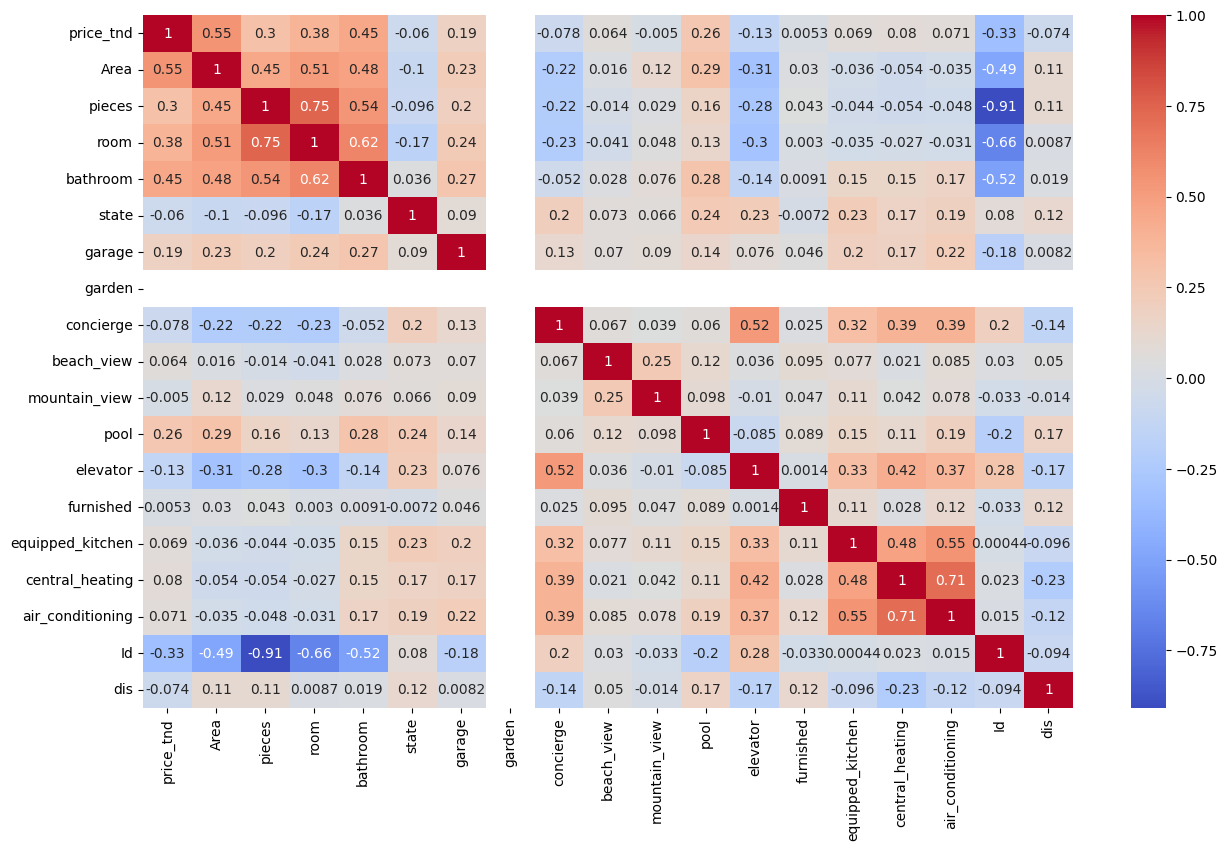

In [67]:
fig, ax = plt.subplots(figsize=(15, 9))
corr =cl_train[numerical_features].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [ ]:
cl_train.isnull().sum()

<AxesSubplot: xlabel='central_heating', ylabel='air_conditioning'>

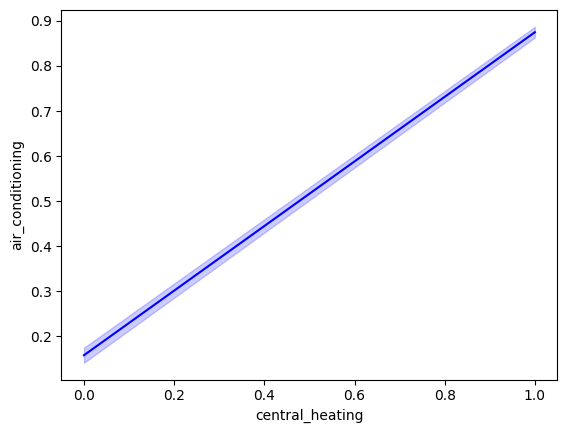

In [68]:
sns.lineplot(x='central_heating',y='air_conditioning',color='b',data=cl_train)

In [ ]:
num_ones =cl_train['air_conditioning'].value_counts()[1]
print(f"Number of zeros in 'air_conditioning': {num_ones}")
num_one =cl_train['central_heating'].value_counts()[1]
print(f"Number of zeros in 'central_heating': {num_ones}")

In [16]:
##on va enlever le feature pieces (on a "room" ),et 'age' ona le feature 'state' qui indique l'age de maison 
cl_train=cl_train.drop(['Id','pieces','air_conditioning','age','room'],axis=1)
test_d=test_d.drop(['Id','pieces','air_conditioning','age','room'],axis=1)

In [ ]:
cl_train['garden'].unique()

In [17]:
cl_train=cl_train.drop('garden',axis=1)
test_d=test_d.drop('garden',axis=1)

In [18]:
# create a dictionary mapping each column to its mode
fill_values = {col: cl_train[col].mode().iloc[0] for col in cl_train.columns}
# fill NaN values with each column's mode
cl_train.fillna(value=fill_values, inplace=True)

In [19]:
###missing_value
cl_train=cl_train.interpolate(method='linear')


array(['Hammamet', 'Hammam Sousse', 'El Menzah', 'El Hrairia',
       'Sfax Ville', 'El Mourouj', 'Tunis', 'La Marsa', 'Nabeul',
       'La Soukra', 'Ajim', 'Hammam Chatt', 'Sousse Jaouhara', 'Carthage',
       'Djerba', 'Ariana Ville', 'Le Kram', 'Midoun', 'La Manouba',
       'Le Bardo', 'Bizerte Nord', 'Mahdia Ville', 'Rades',
       'Boumhel Bassatine', 'Mornag', 'Mohamadia', 'Akouda', 'Raoued',
       'Mornaguia', 'Sousse Riadh', 'Sousse Ville', 'La Goulette',
       'El Kabaria', 'Houmt Souk', 'Cité El Khadra', 'Mégrine',
       'Bizerte Sud', 'Ettadhamen', 'Monastir Ville', 'Ben Arous',
       'Nouvelle Medina', 'Béja', 'Beni Khiar', 'Hammam Lif', 'Mnihla',
       'Ezzahra', 'Fouchana', 'El Omrane', 'Kairouan Ville',
       'El Omrane Superieur', 'Sakiet Ezzit', 'Ettahrir', 'Sfax Sud',
       'Sakiet Eddaier', 'Menzel Chaker', 'Tebourba', 'Tabarka',
       'Gabès Ville', 'Jedaida', 'Douar Hicher', 'Sfax Ouest',
       'El Ouardia', 'Metline', 'Sidi Thabet', 'Sidi Hassine',
     

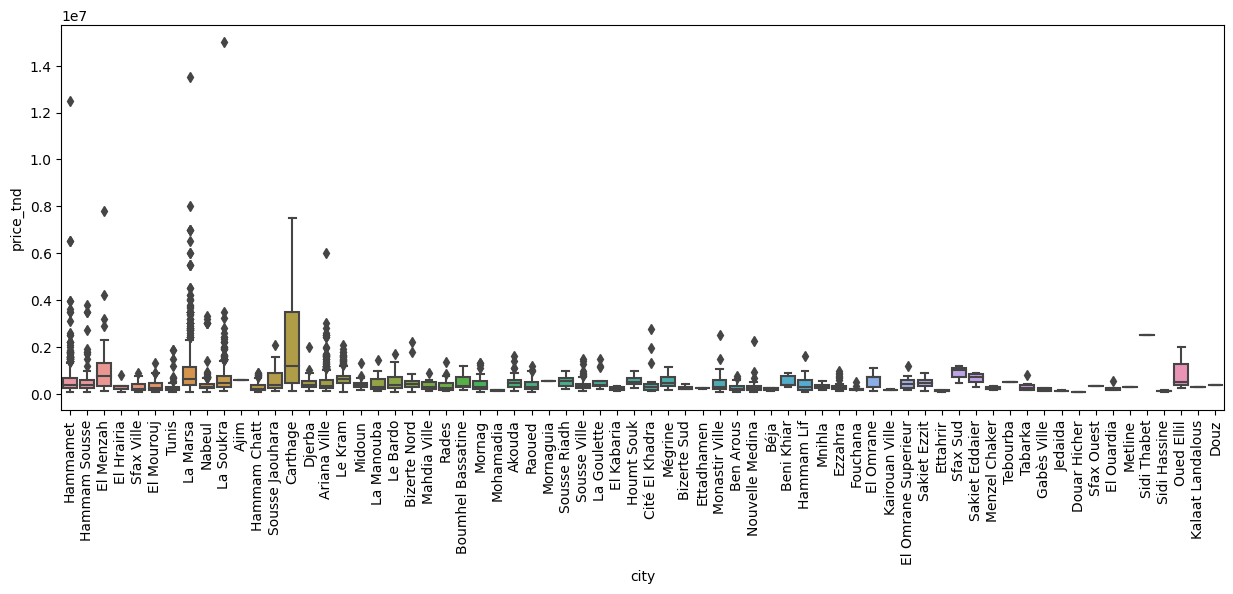

In [20]:
f,axes = plt.subplots(1,1,figsize=(15,5))
sns.boxplot(x='city',y='price_tnd',data=cl_train)
plt.xticks(rotation=90)
cl_train['city'].unique()

In [ ]:
f,axes = plt.subplots(figsize=(15,5))
sns.barplot(x='governorate',y='price_tnd',data=cl_train)
plt.xticks(rotation=90)

In [ ]:
f,axes = plt.subplots(figsize=(15,5))
sns.barplot(x='governorate',y='price_tnd',data=cl_train)
plt.xticks(rotation=90)

In [21]:
s = (cl_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['location', 'city', 'governorate']


In [22]:

#fit and transform label encoder on a categorical column
for col in object_cols :
    freq_encoding = cl_train.groupby(col)[col].transform('count') / len(cl_train)
    cl_train[col] = freq_encoding
    fre_encoding = test_d.groupby(col)[col].transform('count') / len(test_d)
    test_d[col] = fre_encoding
    
cl_train.head()

,price_tnd,location,city,governorate,Area,bathroom,state,long,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating
9,2200000.0,0.003209,0.302525,0.046641,600.0,3.0,1.0,10.850000,1,0,0,0,1,0,0,0,1
10,2200000.0,0.001712,0.302525,0.046641,600.0,3.0,2.0,11.012510,1,0,0,0,1,0,0,1,1
11,775000.0,0.003209,0.302525,0.046641,350.0,5.0,1.0,10.850000,0,0,0,0,0,0,0,0,1
20,755000.0,0.003209,0.302525,0.046641,350.0,5.0,1.0,11.040065,1,0,0,0,0,0,1,1,0
27,900000.0,0.044501,0.302525,0.266153,300.0,3.0,2.0,10.614570,0,0,0,0,0,0,0,0,0


In [23]:
cl_train=cl_train.drop(['furnished','location'],axis=1)
test_d=test_d.drop(['furnished','location'],axis=1)

In [ ]:
cl_train['city'].unique()

In [ ]:
cl_train.head()


In [25]:
y=cl_train['price_tnd']
X=cl_train.drop('price_tnd',axis=1)
X.head()
y

9       2200000.0
10      2200000.0
11       775000.0
20       755000.0
27       900000.0
          ...    
5672     338000.0
5673     480000.0
5674    1800000.0
5675     405000.0
5676     290000.0
Name: price_tnd, Length: 4674, dtype: float64

In [26]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X,y)
params = {
   'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [200, 500, 1000],
    'max_depth': [3, 5, 7]
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X,y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [200, 500, 1000]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred=grid_search.best_estimator_.predict(test_d)

In [28]:
data = pd.read_csv("/kaggle/input/tunisian-house-prices-prediction/test.csv")
data['price_tnd']=y_pred
data=data.loc[:,['Id','price_tnd']]

In [30]:
data.to_csv('submission.csv',index=False)